In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

## Simple square root

$y = \mu * \sqrt{T}$

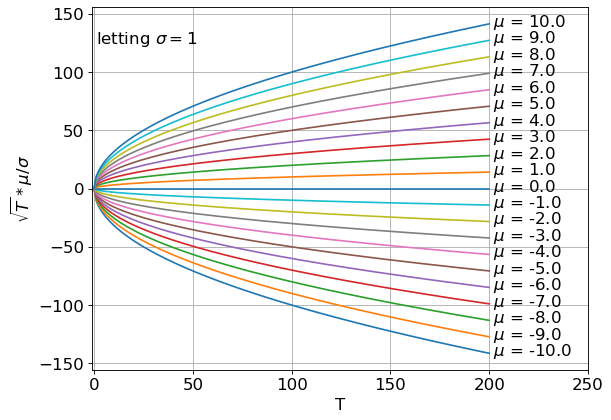

In [2]:
# Adjusting plot dimensions and font
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

# Range of mu's to plot
mu = np.linspace(-10,10,21)

# X data
x = np.linspace(0, 200, 201)

# Plot the function for all values of mu
for mu in mu: 
    y = mu * x**0.5
    plt.plot(y)
    plt.text(202, y[-1]-2, '$\mu$ = ' + str(mu))
    
plt.ylabel(r'$\sqrt{T} * \mu  / \sigma$')
plt.xlabel("T")
plt.text(1, 125, "letting $\sigma = 1$")
plt.xlim(-1, 250)
plt.grid()

## Sqruare root with noise 


$y = \mu * \sqrt{T} + \epsilon$, where $\epsilon$ is a random shock, drawn from a standardized normal distribution

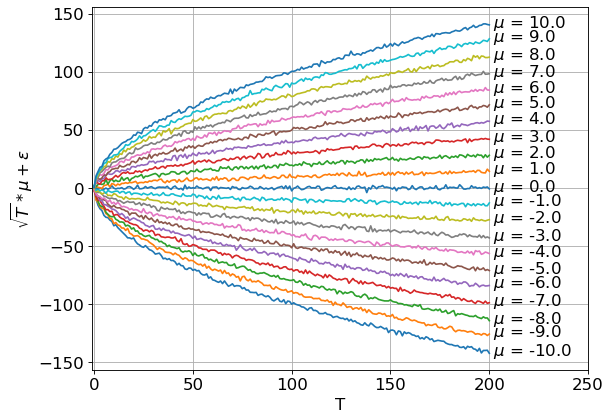

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

mu = np.linspace(-10,10,21)
x = np.linspace(0, 200, 201)

for mu in mu: 
    noise = np.random.normal(0,1,201) # gaussian, mean, var, # of points
    y = mu * x**0.5 + noise
    plt.plot(y)
    plt.text(202, y[-1]-2, '$\mu$ = ' + str(mu))
    
plt.ylabel(r'$\sqrt{T} * \mu  + \epsilon$')
plt.xlabel("T")
plt.xlim(-1, 250)
plt.grid()

### Fitting one of the curves above

In [4]:
# Fitting function
def sqrt_function(T, mu, epsilon):
    return mu*T**0.5 + epsilon

[10.00119522  0.02115315]


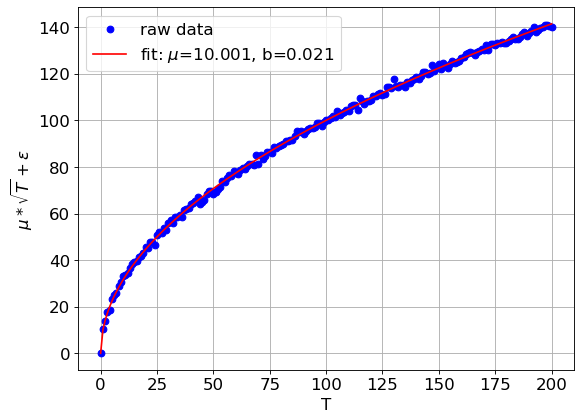

In [5]:
# Raw data
raw_x = x # same as above
raw_y = y # mu=10

# Figure params
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

# Plot the raw data
plt.plot(raw_x, raw_y, 'bo', label='raw data')

# Fitting the data
popt, pcov = curve_fit(sqrt_function, raw_x, raw_y)
print(popt)

# Plotting the fitted curve
plt.plot(raw_x, sqrt_function(raw_x, *popt), 'r', label='fit: $\mu$=%5.3f, b=%5.3f' % tuple(popt))

plt.grid()
plt.legend()
plt.xlabel("T")
plt.ylabel("$\mu*\sqrt{T}+\epsilon$")
plt.show()

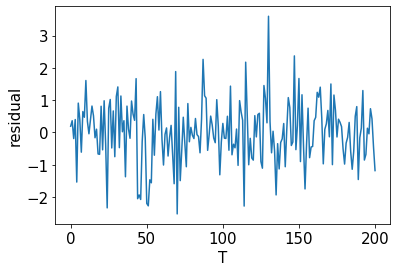

In [6]:
# Looking at the residuals
residual = raw_y - sqrt_function(raw_x, *popt)

# PLot the residual
plt.plot(raw_x, residual)
plt.ylabel('residual')
plt.xlabel('T')
plt.show()

In [7]:
# Standard deviation of residuals (should be = 1, the std of our noise term)
print(np.std(residual))

0.9501902898363658


## Square root with noise that increases in magnitude over time

$y = \mu * \sqrt{T} + \epsilon * T^{0.4}$, where $\epsilon$ is a random shock, drawn from a standardized normal distribution

### Generating and plotting the data

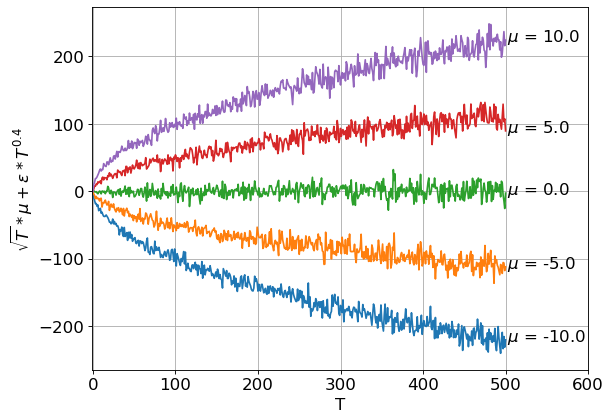

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

mu = np.linspace(-10,10,5)
x = np.linspace(0, 500, 501)

for mu in mu: 
    noise = np.random.normal(0,1,501) # gaussian, mean, var, # of points
    increasing_noise = noise * x**0.4
    y = mu * x**0.5 + increasing_noise
    plt.plot(y)
    plt.text(502, y[-1]-2, '$\mu$ = ' + str(mu))
    
plt.ylabel(r'$\sqrt{T} * \mu + \epsilon * T^{0.4}$')
plt.xlabel("T")
plt.xlim(-1, 600)
plt.grid()

### Fitting the data 

[10.0863666  -1.48900726]


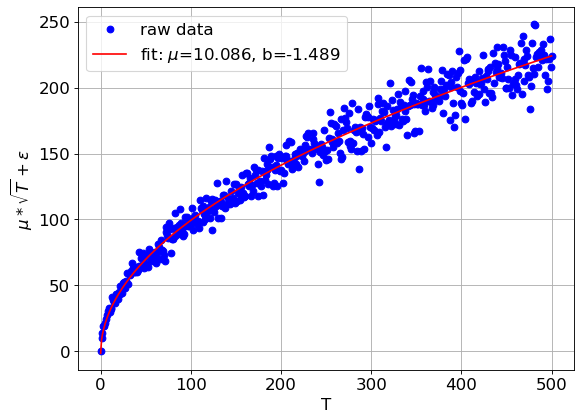

In [9]:
# Raw data
raw_x = x # same as above
raw_y = y # mu=10

# Figure params
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

# Plot the raw data
plt.plot(raw_x, raw_y, 'bo', label='raw data')

# Fitting the data
popt, pcov = curve_fit(sqrt_function, raw_x, raw_y)
print(popt)

# Plotting the fitted curve
plt.plot(raw_x, sqrt_function(raw_x, *popt), 'r', label='fit: $\mu$=%5.3f, b=%5.3f' % tuple(popt))

plt.grid()
plt.legend()
plt.xlabel("T")
plt.ylabel("$\mu*\sqrt{T}+\epsilon$")
plt.show()

### Inspecting the fit

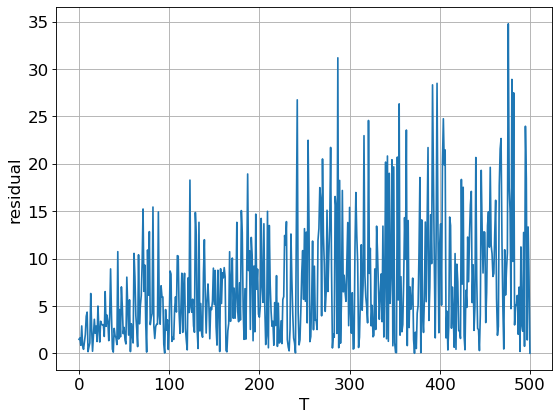

In [10]:
# Looking at the residuals
residual = raw_y - sqrt_function(raw_x, *popt)

# Figure params
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

# PLot the residual
plt.plot(raw_x, np.absolute(residual))
plt.ylabel('residual')
plt.xlabel('T')
plt.grid()
plt.show()

### Does the magnitude of the noise grow with $T^{0.4}$?

In [11]:
def res_function(T, a, b):
    return T**a + b

fitted exponent: 0.3775371237703098


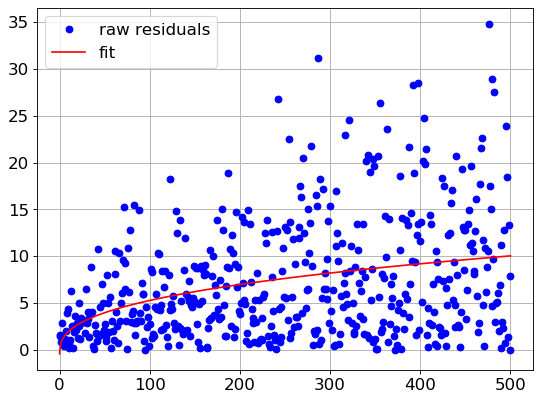

In [12]:
# Taking the absolute value of the residual
res = np.absolute(residual)

# Figure params
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 15})

# Fitting the data
popt, pcov = curve_fit(res_function, raw_x, res)
print(f'fitted exponent: {popt[0]}')

# Plotting the fitted data and the raw residuals (abs val)
plt.plot(raw_x, res, 'bo', label='raw residuals')
plt.plot(raw_x, res_function(raw_x, *popt), 'r', label='fit')
plt.legend()
plt.grid()
plt.show()

## Random walk

Equal prob of up and down moves. 

### One simple random walk

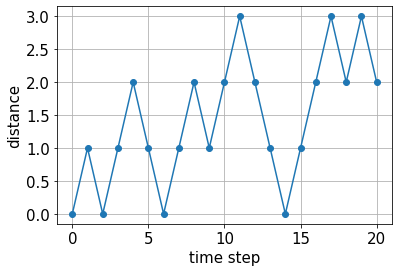

In [13]:
# Number of time steps
Nt = 20

# Number of paths
Np = 1

# Generate a set of random floats from normal distribution, Nt rows, Np columns
z = np.random.normal(size=(Nt, Np))

# Transform random variables into a binary +- 1
x = np.sign(z)
 
# Initialize empty matrix for placing sample paths
s = np.empty((Nt+1, Np))

# Creating the paths
for i in range(0,Nt):
    s[i+1] = s[i] + x[i]

# Plotting the random walk(s)
plt.plot(s, '-o')
plt.ylabel("distance")
plt.xlabel("time step")
plt.grid()
plt.show()

### Many random walks

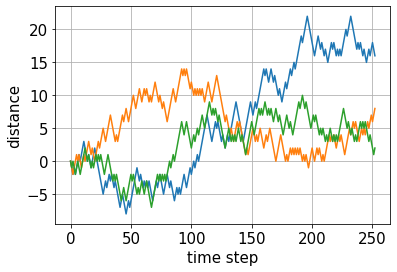

In [38]:
# Number of time steps
Nt = 252

# Number of paths
Np = 100

# Generate a set of random floats from normal distribution, Nt rows, Np columns
z = np.random.normal(size=(Nt, Np))

# Transform random variables into a binary +- 1
x = np.sign(z)
 
# Initialize empty matrix for placing sample paths
s = np.empty((Nt+1, Np))

# Looping over paths
for i in range(0,Np):
    # Looping over time steps
    for j in range(0,Nt):
        s[j+1,i] = s[j,i] + x[j,i]

# Plotting the random walk(s)
plt.plot(s[:,0:3])
plt.ylabel("distance")
plt.xlabel("time step")
plt.grid()
plt.show()

### Many random walks, method #2

In [44]:
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

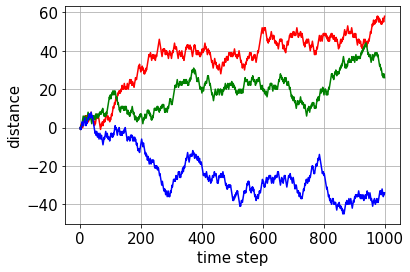

In [46]:
rw1 = randomwalk1D(1000)
rw2 = randomwalk1D(1000)
rw3 = randomwalk1D(1000)
plt.plot(rw1[0], rw1[1], 'r-', label="rw1")
plt.plot(rw2[0], rw2[1], 'g-', label="rw2")
plt.plot(rw3[0], rw3[1], 'b-', label="rw3")
plt.grid()
plt.ylabel("distance")
plt.xlabel("time step")
plt.show()

In [52]:
type(rw1[0])

numpy.ndarray